<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/3rdWeekTask/CreditDataSet_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
#import semua library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Memuat dataset
file_path = 'sample_data/CreditDataset.csv'
data = pd.read_csv(file_path)

In [109]:
# Encode variabel kategori menggunakan LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == object:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [110]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data.drop(columns='Class')
y = data['Class']

In [111]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
# Memisahkan data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)


In [113]:
# Menyesuaikan nilai target dari {1, 2} menjadi {0, 1} untuk klasifikasi biner
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [114]:
# Membangun model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=15)  # Menggunakan 15 tetangga terdekat
knn.fit(X_train, y_train_adjusted)

KNeighborsClassifier(n_neighbors=15)

In [115]:
# Memprediksi hasil pada data test
y_pred_adjusted = knn.predict(X_test)
y_prob_adjusted = knn.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC dan AUC


In [116]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_adjusted, y_pred_adjusted)  # Akurasi
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_adjusted)  # Confusion Matrix
class_report = classification_report(y_test_adjusted, y_pred_adjusted)  # Laporan klasifikasi
roc_auc = roc_auc_score(y_test_adjusted, y_prob_adjusted)  # AUC Score
fpr, tpr, _ = roc_curve(y_test_adjusted, y_prob_adjusted)  # Data untuk ROC curve


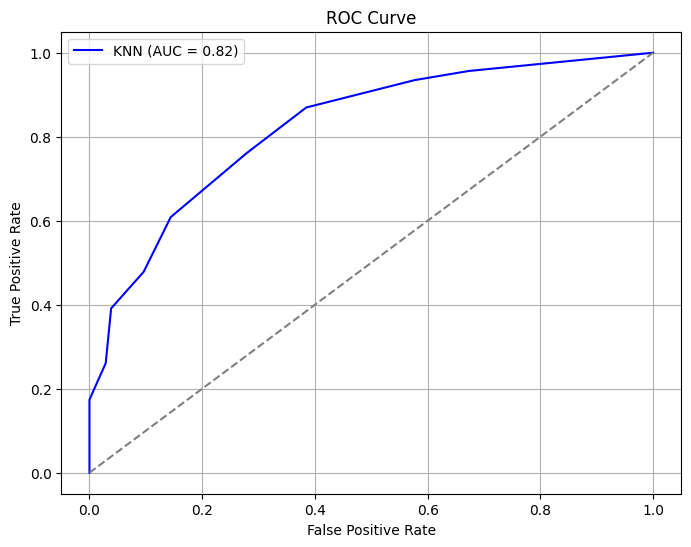

In [117]:
# Menampilkan ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


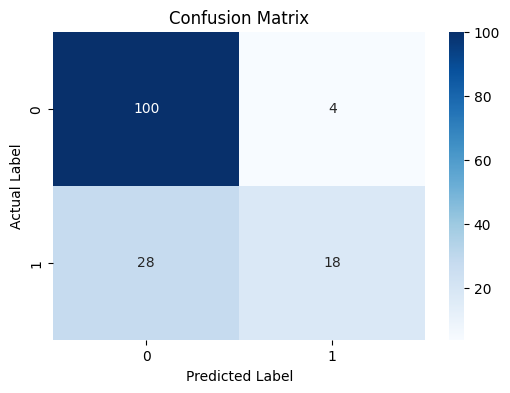

In [118]:
# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Heatmap Confusion Matrix
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [119]:
# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("AUC Score:", roc_auc)

Akurasi: 0.7866666666666666
Confusion Matrix:
 [[100   4]
 [ 28  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       104
           1       0.82      0.39      0.53        46

    accuracy                           0.79       150
   macro avg       0.80      0.68      0.70       150
weighted avg       0.79      0.79      0.76       150

AUC Score: 0.8232650501672241
